In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import os
from os import listdir
from os.path import isfile, join

# Collecting NBA contract data from Spotrac

In [2]:
# spotrac players contracts

spotrac_player_contracts = pd.read_html('https://www.spotrac.com/nba/contracts/sort-value/all-time/limit-2000/')[0]

In [3]:
spotrac_player_contracts.head()

,Rank,Player,Signed Age,Yrs,Value,AAV,Sign Bonus
0,1,Giannis Antetokounmpo Power Forward | 2021-20...,26,5,"$228,200,826","$45,640,165",NaN
1,2,Russell Westbrook Point Guard | 2018-2022 (FA...,28,5,"$206,794,070","$41,358,814",NaN
2,3,Rudy Gobert Center | 2021-2025 (FA: 2026),28,5,"$205,000,002","$41,000,000",NaN
3,4,Stephen Curry Point Guard | 2017-2021 (FA: 2022),29,5,"$201,158,790","$40,231,758",NaN
4,5,Klay Thompson Shooting Guard | 2019-2023 (FA:...,29,5,"$189,903,600","$37,980,720",NaN


In [4]:
spotrac_player_contracts.Player[0]

'Giannis Antetokounmpo  Power Forward | 2021-2025 (FA: 2026)'

In [5]:
#dataframe column names

spotrac_player_contracts.columns.to_list()

['Rank', 'Player', 'Signed Age', 'Yrs', 'Value', 'AAV', 'Sign Bonus']

In [6]:
# seperate 'Player' column into Name | Position | Contract Duration

spotrac_player_contracts['Name']=spotrac_player_contracts.Player.apply(lambda x : x.split("|")[0].split("  ")[0])
spotrac_player_contracts['Position']=spotrac_player_contracts.Player.apply(lambda x : x.split("|")[0].split("  ")[1])
spotrac_player_contracts['Contract_Duration'] = spotrac_player_contracts.Player.apply(lambda x : x.split("|")[1].split(" (")[0])

#Split Contract Duration into Start and End
spotrac_player_contracts['Contract_Begin'] = spotrac_player_contracts.Player.apply(lambda x : int(x.split("|")[1].split(" (")[0].split('-')[0]))
spotrac_player_contracts['Contract_End'] = spotrac_player_contracts.Player.apply(lambda x : int(x.split("|")[1].split(" (")[0].split('-')[1]))



In [7]:
def name_to_id(name):
    """
    PARAMETERS
    name: (str) NBA players full name e.g 'Kobe Bryant'
    
    RETURN
    returns player_id formatted as 'LLLLLFFNN'
    
    where ‘LLLLL’ are the first 5 letters in the player’s last name, ‘FF’, are the first 2 letters 
    in the player’s first name, and ‘NN’ is a number starting at ‘01’ for the first time that player ID 
    has been used and increments by 1 for every successive player.
    
    e.g "Kobe Bryant" - returns bryanko01
    """
    
    name = name.replace('.','').replace("'",'').replace("ö",'o').replace("-","").replace("é","e").split(" ")
    return str.lower(name[1][:5]+ name[0][:2] +"01")

name_to_id("C.J McCollum")

'mccolcj01'

In [8]:
# new column called Player_id
spotrac_player_contracts['Player_id'] = spotrac_player_contracts.Name.apply(name_to_id)

#fringe case where 2 players have the same player_id based on thier names
spotrac_player_contracts.Player_id.loc[spotrac_player_contracts.Name == 'Patrick Mills'] = 'millspa02'
spotrac_player_contracts.Player_id.loc[spotrac_player_contracts.Name == 'Edrice Adebayo'] = 'adebaba01'
spotrac_player_contracts.Player_id.loc[spotrac_player_contracts.Name == 'Maxi Kleber'] = 'klebima01'
spotrac_player_contracts.Player_id.loc[spotrac_player_contracts.Name == 'Clint Capela'] = 'capelca01'
spotrac_player_contracts.Player_id.loc[spotrac_player_contracts.Name == 'Cedi Osman'] = 'osmande01'
spotrac_player_contracts.Player_id.loc[spotrac_player_contracts.Name == 'Luc Richard Mbah a Moute']= 'mbahalu01'
spotrac_player_contracts.Player_id.loc[spotrac_player_contracts.Name == 'Sasha Pavlovic'] = 'pavloal01'
spotrac_player_contracts.Player_id.loc[spotrac_player_contracts.Name == 'Bojan Bogdanovic'] = 'bogdabo02'
spotrac_player_contracts.Player_id.loc[spotrac_player_contracts.Name == 'Derrick Williams'] = 'willide02'
spotrac_player_contracts.Player_id.loc[spotrac_player_contracts.Name == 'Jerian Grant'] = 'grantje02'

#morris twin
spotrac_player_contracts.Player_id.loc[spotrac_player_contracts.Name == 'Markieff Morris'] = 'morrima02'
spotrac_player_contracts.Player_id.loc[spotrac_player_contracts.Name == 'Marcus Morris Sr.'] = 'morrima03'

C:\Users\eaj\anaconda3\envs\Sportipy\lib\site-packages\pandas\core\indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [9]:
# removeing ["$" , ","] from Value and AAV then convert to int  e.g. $1,000  --  1000
spotrac_player_contracts['Value']=spotrac_player_contracts.Value.apply(lambda x: int(x.strip('$').replace(',','')))
spotrac_player_contracts['AAV']=spotrac_player_contracts.AAV.apply(lambda x: int(x.strip('$').replace(',','')))

In [10]:
# drop columns ['Player','Rank','Sign Bonus','Contract_Duration']

spotrac_player_contracts = spotrac_player_contracts.drop(['Player','Rank','Sign Bonus','Contract_Duration'],axis=1)
spotrac_player_contracts.head()

,Signed Age,Yrs,Value,AAV,Name,Position,Contract_Begin,Contract_End,Player_id
0,26,5,228200826,45640165,Giannis Antetokounmpo,Power Forward,2021,2025,antetgi01
1,28,5,206794070,41358814,Russell Westbrook,Point Guard,2018,2022,westbru01
2,28,5,205000002,41000000,Rudy Gobert,Center,2021,2025,goberru01
3,29,5,201158790,40231758,Stephen Curry,Point Guard,2017,2021,curryst01
4,29,5,189903600,37980720,Klay Thompson,Shooting Guard,2019,2023,thompkl01


In [11]:
# rearrange columns
spotrac_player_contracts.columns.to_list()
cols = ['Name','Value','AAV','Player_id','Position','Signed Age','Yrs','Contract_Begin','Contract_End']

spotrac_player_contracts = spotrac_player_contracts[cols]
spotrac_player_contracts.head()

,Name,Value,AAV,Player_id,Position,Signed Age,Yrs,Contract_Begin,Contract_End
0,Giannis Antetokounmpo,228200826,45640165,antetgi01,Power Forward,26,5,2021,2025
1,Russell Westbrook,206794070,41358814,westbru01,Point Guard,28,5,2018,2022
2,Rudy Gobert,205000002,41000000,goberru01,Center,28,5,2021,2025
3,Stephen Curry,201158790,40231758,curryst01,Point Guard,29,5,2017,2021
4,Klay Thompson,189903600,37980720,thompkl01,Shooting Guard,29,5,2019,2023


## EDA

<AxesSubplot:xlabel='Contract_Begin', ylabel='AAV'>

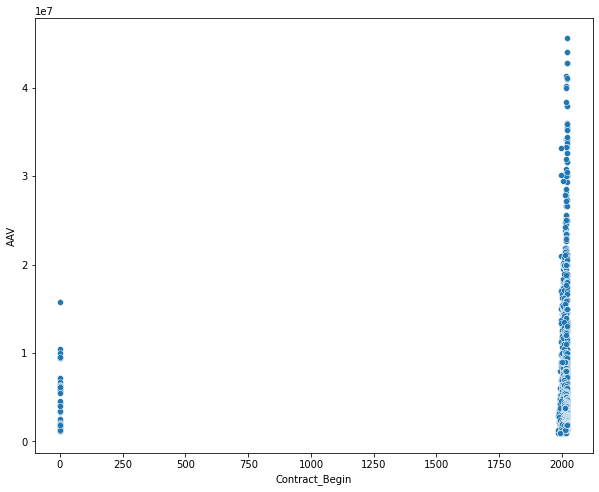

In [12]:
# Scatterplot of Year VS AAV

fig = plt.figure(figsize=(10,8))
sns.scatterplot(x=spotrac_player_contracts.Contract_Begin,y=spotrac_player_contracts.AAV)

In [13]:
#Hypothesis : We should see an increase in Average Annual Vaule as move closer and closer to the present era. Due to the gradual increase of salary cap every year

# There seems to be players with a nun/0 in the Contact_Begin feature. I assume that its because these contracts are
# either 10-day contracts, 2-way contracts etc.

In [14]:
# unique Values
spotrac_player_contracts.Contract_Begin.unique()

array([2021, 2018, 2017, 2019, 2020, 2016, 2004, 2003, 1998, 2014, 2010,
       1996, 2007, 2001, 2015, 2008, 2013, 2005, 2012, 2000, 2011, 1999,
       2002, 2006, 1993, 1994,    0, 1997, 2009, 1995, 1991, 1988, 1984,
       1990, 1992, 1985], dtype=int64)

In [15]:
# players with 0 in Contract_begin feature
spotrac_player_contracts[spotrac_player_contracts.Contract_Begin == 0].head()

,Name,Value,AAV,Player_id,Position,Signed Age,Yrs,Contract_Begin,Contract_End
163,Erick Dampier,73000000,10428571,dampier01,Center,-1,7,0,2010
195,Raef Lafrentz,69973750,9996250,lafrera01,Power Forward,-1,7,0,2008
229,Wally Szczerbiak,63000000,15750000,szczewa01,Small Forward,-1,4,0,0
325,Kenny Thomas,50000000,7142857,thomake01,Small Forward,-1,7,0,2009
354,Bobby Simmons,47000000,9400000,simmobo01,Small Forward,-1,5,0,0


In [16]:
# these contracts dont seem to be 10-day or two way contracts
# so instead of removing them i will just take "Contract_End - Yrs" = Contract_begin

spotrac_player_contracts['Contract_Begin'] = spotrac_player_contracts.apply(lambda x: x['Contract_End'] - x['Yrs'],axis=1)
spotrac_player_contracts

,Name,Value,AAV,Player_id,Position,Signed Age,Yrs,Contract_Begin,Contract_End
0,Giannis Antetokounmpo,228200826,45640165,antetgi01,Power Forward,26,5,2020,2025
1,Russell Westbrook,206794070,41358814,westbru01,Point Guard,28,5,2017,2022
2,Rudy Gobert,205000002,41000000,goberru01,Center,28,5,2020,2025
3,Stephen Curry,201158790,40231758,curryst01,Point Guard,29,5,2016,2021
4,Klay Thompson,189903600,37980720,thompkl01,Shooting Guard,29,5,2018,2023
...,...,...,...,...,...,...,...,...,...
1995,Nazr Mohammed,3750000,3750000,mohamna01,Center,33,1,2010,2011
1996,Mo Williams,3750000,3750000,willimo01,Point Guard,31,1,2013,2014
1997,Al-Farouq Aminu,3749602,3749602,aminual01,Power Forward,22,1,2012,2013
1998,Nerlens Noel,3745548,1872774,noelne01,Center,24,2,2017,2019


In [17]:
# unique Values
spotrac_player_contracts.Contract_Begin.unique()

array([2020, 2017, 2016, 2018, 2019, 2015, 2003, 2002, 1997, 2013, 2009,
       1995, 2006, 2000, 2014, 2004, 2007, 2012, 2011, 1999, 2010, 2001,
       1998, 2005, 2008, 1992, 1993, 1996,   -4, 1994,   -5,   -7, 2021,
       1989, 1987, 1984, 1990, 1991, 1982,   -2,   -3,   -1], dtype=int64)

In [18]:
spotrac_player_contracts[spotrac_player_contracts.Contract_Begin <2010]

,Name,Value,AAV,Player_id,Position,Signed Age,Yrs,Contract_Begin,Contract_End
37,Kobe Bryant,136434375,19490625,bryanko01,Small Forward,25,7,2003,2010
43,Jermaine O'Neal,126588000,18084000,onealje01,Center,24,7,2002,2009
44,Kevin Garnett,126016300,21002717,garneke01,Power Forward,21,6,1997,2003
47,Joe Johnson,123658089,20609682,johnsjo01,Shooting Guard,28,6,2009,2015
48,Tim Duncan,122007706,17429672,duncati01,Power Forward,26,7,2002,2009
...,...,...,...,...,...,...,...,...,...
1986,Grant Hill,3806400,1903200,hillgr01,Small Forward,34,2,2006,2008
1988,Maceo Baston,3800000,1900000,bastoma01,Center,-1,2,-2,0
1992,Dickey Simpkins,3770000,942500,simpkdi01,Power Forward,21,4,1993,1997
1993,Sam Cassell,3770000,942500,cassesa01,Point Guard,23,4,1992,1996


In [19]:
# remove contracts before 2010
spotrac_player_contracts = spotrac_player_contracts[spotrac_player_contracts.Contract_Begin > 2010]
spotrac_player_contracts

,Name,Value,AAV,Player_id,Position,Signed Age,Yrs,Contract_Begin,Contract_End
0,Giannis Antetokounmpo,228200826,45640165,antetgi01,Power Forward,26,5,2020,2025
1,Russell Westbrook,206794070,41358814,westbru01,Point Guard,28,5,2017,2022
2,Rudy Gobert,205000002,41000000,goberru01,Center,28,5,2020,2025
3,Stephen Curry,201158790,40231758,curryst01,Point Guard,29,5,2016,2021
4,Klay Thompson,189903600,37980720,thompkl01,Shooting Guard,29,5,2018,2023
...,...,...,...,...,...,...,...,...,...
1991,John Jenkins,3776280,1258760,jenkijo01,Shooting Guard,20,3,2011,2014
1996,Mo Williams,3750000,3750000,willimo01,Point Guard,31,1,2013,2014
1997,Al-Farouq Aminu,3749602,3749602,aminual01,Power Forward,22,1,2012,2013
1998,Nerlens Noel,3745548,1872774,noelne01,Center,24,2,2017,2019


<AxesSubplot:xlabel='Contract_Begin', ylabel='AAV'>

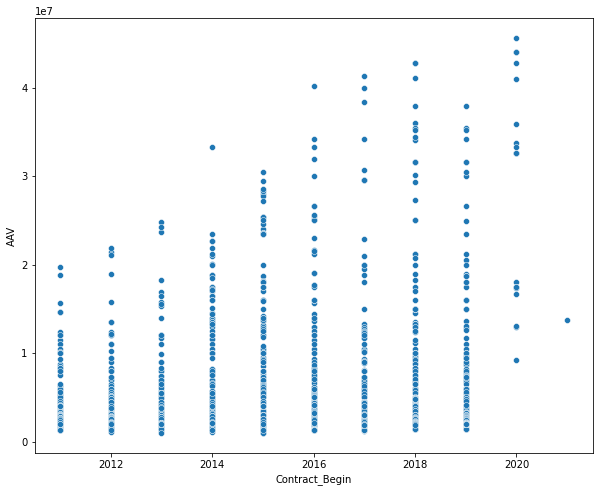

In [20]:
# Scatterplot of Year VS AAV

fig = plt.figure(figsize=(10,8))
sns.scatterplot(x=spotrac_player_contracts.Contract_Begin,y=spotrac_player_contracts.AAV)

########################################################################################

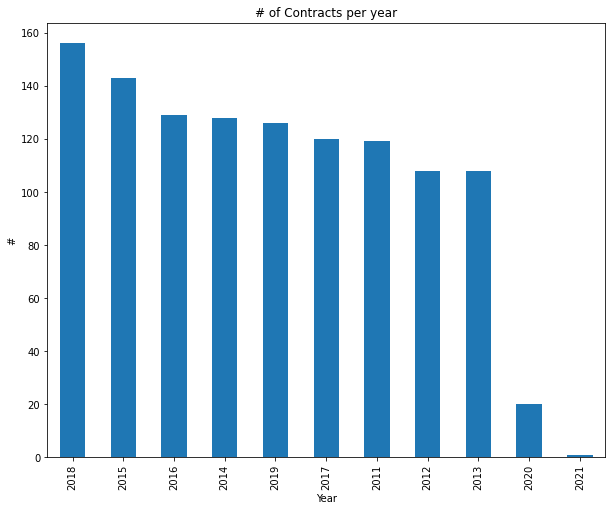

In [21]:
# bar count of contracts signed each year

fig = plt.figure(figsize=(10,8))
spotrac_player_contracts.Contract_Begin.value_counts().sort_values(ascending=False).plot(kind='bar')
plt.title('# of Contracts per year')
plt.xlabel('Year')
plt.ylabel('#')
plt.show()

In [22]:
# unique values of positions
spotrac_player_contracts.Position.unique().tolist()

['Power Forward ',
 'Point Guard ',
 'Center ',
 'Shooting Guard ',
 'Small Forward ',
 'Coach ',
 'Guard ']

In [23]:
# Remove all coach salaries
spotrac_player_contracts = spotrac_player_contracts[spotrac_player_contracts.Position != 'Coach ']
spotrac_player_contracts.head()

,Name,Value,AAV,Player_id,Position,Signed Age,Yrs,Contract_Begin,Contract_End
0,Giannis Antetokounmpo,228200826,45640165,antetgi01,Power Forward,26,5,2020,2025
1,Russell Westbrook,206794070,41358814,westbru01,Point Guard,28,5,2017,2022
2,Rudy Gobert,205000002,41000000,goberru01,Center,28,5,2020,2025
3,Stephen Curry,201158790,40231758,curryst01,Point Guard,29,5,2016,2021
4,Klay Thompson,189903600,37980720,thompkl01,Shooting Guard,29,5,2018,2023


In [24]:
# players with the most data points(Contracts)
spotrac_player_contracts.Name.value_counts().loc[lambda x: x >2]

Kentavious Caldwell-Pope    5
Rajon Rondo                 5
Austin Rivers               5
LeBron James                5
Danilo Gallinari            4
                           ..
Dion Waiters                3
Willie Cauley-Stein         3
Gordon Hayward              3
Al-Farouq Aminu             3
Joe Ingles                  3
Name: Name, Length: 93, dtype: int64

In [25]:
spotrac_player_contracts['Signed Age'].unique()

array(['26', '28', '29', '27', '22', '30', '24', '23', '33', '21', '25',
       '31', '36', '32', '18', '35', '34', '19', '38', '20', '39', '37',
       '40', '0'], dtype=object)

In [26]:
spotrac_player_contracts['Signed Age'].value_counts()

19    94
27    90
24    86
23    82
26    81
25    80
28    72
21    70
18    70
22    64
29    63
20    57
30    56
31    40
32    34
33    26
36    20
34    16
35    10
39     6
38     4
37     3
0      2
40     1
Name: Signed Age, dtype: int64

In [27]:
# Since the focus of this project is on free agency i will remove 18-22 year old 
# from the dataset as majority of them are rookies entering the NBA

In [28]:
# 0 values in age 
spotrac_player_contracts[spotrac_player_contracts['Signed Age'] == "0" ]

,Name,Value,AAV,Player_id,Position,Signed Age,Yrs,Contract_Begin,Contract_End
1521,Facundo Campazzo,6400000,3200000,campafa01,Point Guard,0,2,2019,2021
1623,Sonny Weems,5754630,2877315,weemsso01,Shooting Guard,0,2,2014,2016


In [29]:
# remove 0 signed age
spotrac_player_contracts = spotrac_player_contracts[spotrac_player_contracts['Signed Age'] !="0"]

In [30]:
# change dtype of Signed Aged
spotrac_player_contracts['Signed Age'] = spotrac_player_contracts['Signed Age'].astype('int64')
# pd.to_numeric(spotrac_player_contracts['Signed Age'])

In [31]:
# rookie contracts?
spotrac_player_contracts = spotrac_player_contracts[spotrac_player_contracts['Signed Age'] > 24]

In [32]:
spotrac_player_contracts

,Name,Value,AAV,Player_id,Position,Signed Age,Yrs,Contract_Begin,Contract_End
0,Giannis Antetokounmpo,228200826,45640165,antetgi01,Power Forward,26,5,2020,2025
1,Russell Westbrook,206794070,41358814,westbru01,Point Guard,28,5,2017,2022
2,Rudy Gobert,205000002,41000000,goberru01,Center,28,5,2020,2025
3,Stephen Curry,201158790,40231758,curryst01,Point Guard,29,5,2016,2021
4,Klay Thompson,189903600,37980720,thompkl01,Shooting Guard,29,5,2018,2023
...,...,...,...,...,...,...,...,...,...
1953,Torrey Craig,4000000,2000000,craigto01,Small Forward,27,2,2017,2019
1954,Damyean Dotson,4000000,2000000,dotsoda01,Shooting Guard,26,2,2019,2021
1977,Darren Collison,3885500,1942750,collida01,Point Guard,25,2,2011,2013
1989,Shabazz Napier,3787723,1893862,napiesh01,Point Guard,27,2,2017,2019


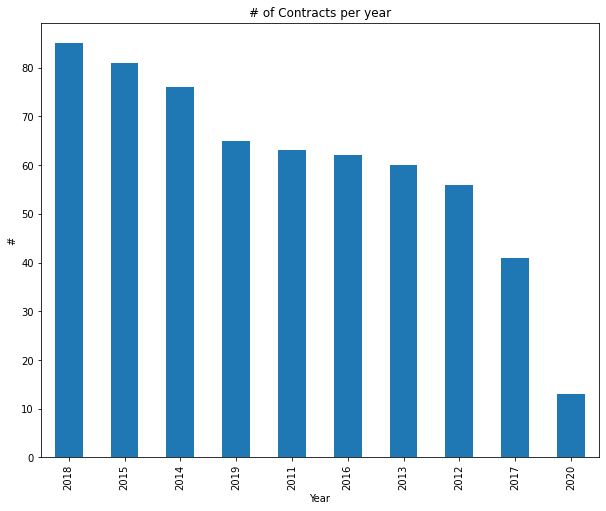

In [33]:
# bar count of contracts signed each year

fig = plt.figure(figsize=(10,8))
spotrac_player_contracts.Contract_Begin.value_counts().sort_values(ascending=False).plot(kind='bar')
plt.title('# of Contracts per year')
plt.xlabel('Year')
plt.ylabel('#')
plt.show()

In [34]:
#dataframe info
spotrac_player_contracts.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 602 entries, 0 to 1996
Data columns (total 9 columns):
Name              602 non-null object
Value             602 non-null int64
AAV               602 non-null int64
Player_id         602 non-null object
Position          602 non-null object
Signed Age        602 non-null int64
Yrs               602 non-null int64
Contract_Begin    602 non-null int64
Contract_End      602 non-null int64
dtypes: int64(6), object(3)
memory usage: 47.0+ KB


In [35]:
#834 rows of contracts, How many unique players?
spotrac_player_contracts.Name.value_counts().sort_values(ascending=False)

#518

LeBron James     5
Rajon Rondo      5
Aron Baynes      4
J.R. Smith       4
Kevin Durant     4
                ..
Pascal Siakam    1
Jake Layman      1
Jason Terry      1
Josh Smith       1
C.J. McCollum    1
Name: Name, Length: 389, dtype: int64

Since 2011 there were 834 contracts offered and sign by 518 different NBA players, excludeing rookie contracts. Some NBA Players such as Lebron James, KCP, Austin Rivers, Rajon Rondo, and more have signed multiple contract within this time span.

LeBron James                5
Kentavious Caldwell-Pope    5
Austin Rivers               5
Rajon Rondo                 5

In [36]:
spotrac_player_contracts[spotrac_player_contracts.Name == 'LeBron James']

,Name,Value,AAV,Player_id,Position,Signed Age,Yrs,Contract_Begin,Contract_End
25,LeBron James,153312846,38328212,jamesle01,Small Forward,33,4,2017,2021
84,LeBron James,99857127,33285709,jamesle01,Small Forward,31,3,2014,2017
114,LeBron James,85655532,42827766,jamesle01,Small Forward,36,2,2020,2022
355,LeBron James,46974673,23487337,jamesle01,Small Forward,30,2,2014,2016
386,LeBron James,42217798,21108899,jamesle01,Small Forward,29,2,2012,2014


In [37]:
spotrac_player_contracts[(spotrac_player_contracts.Name == 'Paul Millsap')| (spotrac_player_contracts.Name == 'Patrick Mills')]

,Name,Value,AAV,Player_id,Position,Signed Age,Yrs,Contract_Begin,Contract_End
103,Paul Millsap,90000000,30000000,millspa01,Power Forward,31,3,2016,2019
244,Paul Millsap,60216100,20072033,millspa01,Power Forward,30,3,2014,2017
335,Patrick Mills,48000000,12000000,millspa02,Point Guard,28,4,2016,2020
774,Paul Millsap,19000000,9500000,millspa01,Power Forward,28,2,2012,2014
1013,Patrick Mills,13000000,4333333,millspa02,Point Guard,25,3,2013,2016
1191,Paul Millsap,10000000,10000000,millspa01,Power Forward,35,1,2019,2020


# Collect Players Stats from Basketball Reference

In [38]:
#??????????????????????????????????????????????????
from sportsipy.nba.teams import Teams

teams = Teams(2020)
for team in teams:
    # Creates an instance of the roster class for each player on the team.
    roster = team.roster
    for player in roster.players:
        print(player.name)  # Prints the name of each player on the team.

The requested page returned a valid response, but no data could be found. Has the season begun, and is the data available on www.sports-reference.com?


In [39]:
# Player_ids to list
lst_of_playerid = spotrac_player_contracts.Player_id.tolist()

In [40]:
from sportsreference.nba.roster import Player

#pass Player_id thru Players.dataframe module in Sportsreference API to obtain players stats

for i in lst_of_playerid:
    try:
        player = Player(i)
        player_stats = player.dataframe
    
        player_stats.to_csv(f'player_data/{i}')
    except:
        print(spotrac_player_contracts[spotrac_player_contracts.Player_id == i])

In [41]:
# merge salary and players stats, then output to csv

for i in lst_of_playerid:
    # import data from csv
    stat = pd.read_csv(f'player_data/{i}')
    #rename column 'Unnamed: 0' to 'year' & 'player_id' to 'Player_id'
    stat = stat.rename(columns={'Unnamed: 0':'Year','player_id':'Player_id'})
    # drop career stats
    stat = stat[stat.Year != "Career"]
    # change year format e.g 2019-20
    stat['Contract_Begin'] = stat.Year.apply(lambda x: int(x.split('-')[0])+1)
    
    try:
        df = pd.merge(spotrac_player_contracts,stat,on=['Player_id','Contract_Begin'])
        df.to_csv(f'salary_and_stats/{i}')
    except:
        pass

In [108]:
# appending all salary and stats data to 1 dataframe

files = os.listdir('./salary_and_stats')
data =pd.DataFrame()

for i in files:
    x = pd.read_csv(f'salary_and_stats/{i}',index_col=0)
    data = pd.concat([data,x],ignore_index=True)
    
## removeing features that are all nulls or not useful   

data = data.drop(['Value','Signed Age','Yrs','Contract_End','Year','salary'],axis=1)
# fringe stats // 
data = data.drop(['and_ones','blocking_fouls','dunks','half_court_heaves','half_court_heaves_made','nationality','other_turnovers'],axis=1)
# 'position'_percentage
data = data.drop(['center_percentage','point_guard_percentage','power_forward_percentage','shooting_guard_percentage','small_forward_percentage'],axis=1)
# dropping advance stats
data = data.drop(['assist_percentage','block_percentage','defensive_box_plus_minus','defensive_rebound_percentage','defensive_win_shares','field_goal_perc_sixteen_foot_plus_two_pointers','field_goal_perc_ten_to_sixteen_feet','field_goal_perc_three_to_ten_feet','free_throw_attempt_rate','offensive_box_plus_minus','offensive_rebound_percentage','offensive_win_shares','percentage_field_goals_as_dunks','percentage_of_three_pointers_from_corner','percentage_shots_three_pointers','percentage_shots_two_pointers','percentage_sixteen_foot_plus_two_pointers','three_point_attempt_rate','passing_turnovers','take_fouls'],axis=1)
data = data.drop(['offensive_fouls','shooting_distance','points_generated_by_assists','percentage_three_to_ten_footers','field_goal_perc_zero_to_three_feet','shooting_fouls_drawn', 'shots_blocked','three_point_shot_percentage_from_corner','win_shares','win_shares_per_48_minutes','percentage_zero_to_three_footers','three_pointers_assisted_percentage', 'total_rebound_percentage','two_pointers_assisted_percentage','turnover_percentage','percentage_ten_to_sixteen_footers','effective_field_goal_percentage','on_court_plus_minus','two_point_percentage','position','team_abbreviation','steal_percentage'],axis=1)





# contains players previous seasons statistics prior to signing the contract
data.to_csv('Dataset/one_year_stats')

In [109]:
pd.read_csv('Dataset/one_year_stats',index_col=0)

,Name,AAV,Player_id,Position,Contract_Begin,assists,blocks,box_plus_minus,defensive_rebounds,field_goal_attempts,field_goal_percentage,field_goals,free_throw_attempts,free_throw_percentage,free_throws,games_played,games_started,height,lost_ball_turnovers,minutes_played,net_plus_minus,offensive_rebounds,personal_fouls,player_efficiency_rating,points,shooting_fouls,steals,three_point_attempts,three_point_percentage,three_pointers,total_rebounds,true_shooting_percentage,turnovers,two_point_attempts,two_pointers,usage_percentage,value_over_replacement_player,weight
0,Steven Adams,17500000,adamsst01,Center,2020,146.0,67.0,2.9,376.0,478.0,0.592,283.0,201.0,0.582,117.0,63.0,63.0,6-11,NaN,1680.0,NaN,207.0,122.0,20.5,684.0,NaN,51.0,3.0,0.333,1.0,583.0,0.604,94.0,475.0,282.0,17.3,2.1,265
1,Arron Afflalo,12500000,afflaar01,Shooting Guard,2015,129.0,7.0,-2.5,220.0,884.0,0.424,375.0,198.0,0.843,167.0,78.0,72.0,6-5,NaN,2502.0,NaN,27.0,167.0,10.7,1035.0,NaN,41.0,333.0,0.354,118.0,247.0,0.533,116.0,551.0,257.0,19.0,-0.3,210
2,Arron Afflalo,8000000,afflaar01,Shooting Guard,2014,248.0,3.0,-0.2,230.0,1011.0,0.459,464.0,336.0,0.815,274.0,73.0,73.0,6-5,NaN,2552.0,NaN,32.0,136.0,16.0,1330.0,NaN,35.0,300.0,0.427,128.0,262.0,0.574,146.0,711.0,336.0,23.3,1.1,210
3,Alexis Ajinca,5050000,ajincal01,Center,2014,40.0,46.0,-2.6,183.0,249.0,0.546,136.0,67.0,0.836,56.0,56.0,30.0,7-2,NaN,951.0,NaN,94.0,187.0,14.6,328.0,NaN,23.0,1.0,0.000,0.0,277.0,0.589,63.0,248.0,136.0,16.3,-0.1,248
4,Cole Aldrich,7300000,aldrico01,Center,2015,75.0,65.0,0.3,237.0,301.0,0.478,144.0,64.0,0.781,50.0,61.0,16.0,6-11,NaN,976.0,NaN,101.0,122.0,18.1,338.0,NaN,37.0,0.0,NaN,0.0,338.0,0.513,59.0,301.0,144.0,18.3,0.6,250
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
529,Nick Young,5600000,youngni01,Shooting Guard,2011,75.0,17.0,-1.3,148.0,935.0,0.441,412.0,228.0,0.816,186.0,64.0,40.0,6-7,NaN,2034.0,NaN,26.0,144.0,14.5,1115.0,NaN,45.0,271.0,0.387,105.0,174.0,0.538,90.0,664.0,307.0,24.4,0.4,210
530,Nick Young,5192000,youngni01,Shooting Guard,2016,34.0,7.0,-3.7,83.0,372.0,0.339,126.0,76.0,0.829,63.0,54.0,2.0,6-7,NaN,1033.0,NaN,14.0,50.0,9.1,392.0,NaN,23.0,237.0,0.325,77.0,97.0,0.483,30.0,135.0,49.0,18.5,-0.5,210
531,Thaddeus Young,13500000,youngth01,Power Forward,2014,182.0,36.0,-0.1,310.0,1283.0,0.454,582.0,229.0,0.712,163.0,79.0,78.0,6-8,NaN,2718.0,NaN,166.0,213.0,16.6,1417.0,NaN,167.0,292.0,0.308,90.0,476.0,0.512,165.0,991.0,492.0,24.1,1.3,235
532,Thaddeus Young,14545000,youngth01,Power Forward,2018,152.0,36.0,0.2,328.0,864.0,0.487,421.0,92.0,0.598,55.0,81.0,81.0,6-8,NaN,2607.0,NaN,184.0,175.0,14.8,955.0,NaN,135.0,181.0,0.320,58.0,512.0,0.528,105.0,683.0,363.0,17.3,1.4,235


In [111]:
df = pd.read_csv('Dataset/one_year_stats',index_col=0)
df[df.Name == "LeBron James"]

,Name,AAV,Player_id,Position,Contract_Begin,assists,blocks,box_plus_minus,defensive_rebounds,field_goal_attempts,field_goal_percentage,field_goals,free_throw_attempts,free_throw_percentage,free_throws,games_played,games_started,height,lost_ball_turnovers,minutes_played,net_plus_minus,offensive_rebounds,personal_fouls,player_efficiency_rating,points,shooting_fouls,steals,three_point_attempts,three_point_percentage,three_pointers,total_rebounds,true_shooting_percentage,turnovers,two_point_attempts,two_pointers,usage_percentage,value_over_replacement_player,weight
278,LeBron James,38328212,jamesle01,Small Forward,2017,646.0,44.0,7.6,542.0,1344.0,0.548,736.0,531.0,0.674,358.0,74.0,74.0,6-9,NaN,2794.0,NaN,97.0,134.0,27.0,1954.0,NaN,92.0,342.0,0.363,124.0,639.0,0.619,303.0,1002.0,612.0,30.0,6.7,250
279,LeBron James,33285709,jamesle01,Small Forward,2014,488.0,26.0,8.8,452.0,1353.0,0.567,767.0,585.0,0.750,439.0,77.0,77.0,6-9,NaN,2902.0,NaN,81.0,126.0,29.3,2089.0,NaN,121.0,306.0,0.379,116.0,533.0,0.649,270.0,1047.0,651.0,31.0,7.9,250
280,LeBron James,23487337,jamesle01,Small Forward,2014,488.0,26.0,8.8,452.0,1353.0,0.567,767.0,585.0,0.750,439.0,77.0,77.0,6-9,NaN,2902.0,NaN,81.0,126.0,29.3,2089.0,NaN,121.0,306.0,0.379,116.0,533.0,0.649,270.0,1047.0,651.0,31.0,7.9,250
281,LeBron James,42827766,jamesle01,Small Forward,2020,684.0,36.0,8.4,459.0,1303.0,0.493,643.0,381.0,0.693,264.0,67.0,67.0,6-9,NaN,2316.0,NaN,66.0,118.0,25.5,1698.0,NaN,78.0,425.0,0.348,148.0,525.0,0.577,261.0,878.0,495.0,31.5,6.1,250
282,LeBron James,21108899,jamesle01,Small Forward,2012,387.0,50.0,10.9,398.0,1169.0,0.531,621.0,502.0,0.771,387.0,62.0,62.0,6-9,NaN,2326.0,NaN,94.0,96.0,30.7,1683.0,NaN,115.0,149.0,0.362,54.0,492.0,0.605,213.0,1020.0,567.0,32.0,7.6,250


# Exploring Problems

In [43]:
## uncomment to allow JupyterNotebook to remove display limits
# pd.set_option("display.max_rows", None, "display.max_columns", None)

#groupby player_id and name 
data.groupby(['Player_id','Name']).size()

# different players who share the same player id will not return correct stats for the individual

Player_id  Name             
adamsst01  Steven Adams         1
afflaar01  Arron Afflalo        2
ajincal01  Alexis Ajinca        1
aldrico01  Cole Aldrich         1
aldrila01  LaMarcus Aldridge    2
                               ..
wrighde01  Delon Wright         1
wrighdo01  Dorell Wright        1
youngni01  Nick Young           3
youngth01  Thaddeus Young       2
zellety01  Tyler Zeller         1
Length: 341, dtype: int64

In [44]:
# #Testing errors on API calls
# from sportsreference.nba.roster import Player

# for i in spotrac_player_contracts.Player_id:
#     player = Player(i)
#     try:
#         player.points
# #         print(f'{i} : {player.points}')
#     except:
#         print(spotrac_player_contracts[spotrac_player_contracts.Player_id == i])


# x = Player('antetgi01')
# df = x.dataframe
# df

names that need to be fixed [o'neal, capelcl01, dennis schroder, kidd-mi01, worldme01, klebema01,caseydw01,vanst01,omsance01,stevebr01,blattda01,richalu01,ntilifr01,jacksjo01,thiboto01,stottte01,pavlosa01,]

1. Players with nicknames
- Bam adebayo - Edrice adebayo - adebaba01
- Metta World Peace - Ron Artest - artesro01
- Sasha Pavlovic - Aleksandar Pavolovic - pavloal01 

2. API errors - typos?
- Maxi Kleber - kleb(E)ma01 - kleb(I)ma01
- Clint Capela - capelac(L) - capelc(A)01

3. ????
- Frank Ntilikina - ntili(LA)01 
- Cedi Osman - osman(DE)01

4. Players with same names so API sets to 02 instead of 01
- Josh Jackson -jacksjo02

5. Players with different names but same palyer IDs
- Patrick Mills - Paul Millsap

6. Players with special characters
- o'neal, dennis schroder, etc 